In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
#prepare toy dataset using equation y=2x1+5
# np.random.randn(100)*0.9       Random error generator
np.random.seed(11) 
x1 = np.random.randn(1000)
y = 2 * x1 + 5 + np.random.randn(1000)*0.6



In [43]:
data = pd.DataFrame(data= {"x1":x1, "y":y})
data.head()

,x1,y
0,1.749455,8.063807
1,-0.286073,5.202866
2,-0.484565,3.422161
3,-2.653319,0.004922
4,-0.008285,5.768281


In [44]:
def scale(d):
    mean = d.mean()
    sd=d.std()
    return (d-mean)/sd

In [45]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    np.random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = np.array(
            indices[i:min(i+batch_size,num_examples)]
        )
        yield features[batch_indices],labels[batch_indices]


In [46]:
#Get features and Labels with scaling in place
features=scale(
    np.reshape(np.array(data.iloc[:,0]),(len(data),1))
)

labels=scale(
    np.reshape(np.array(data.iloc[:,1]),(len(data),1))
)

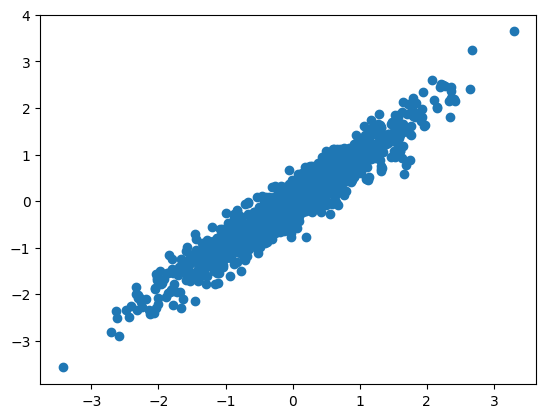

In [47]:
plt.scatter(features,labels)
plt.show()

In [48]:
class LinearRegression:
    def __init__(self,X,y,W,b):
        self.X=X
        self.y=y
        self.W=W
        self.b=b
        self.y_pred = self.LinearModel()

    def LinearModel(self):
        return np.dot(self.X,self.W) + self.b
    
    def mse_loss(self, y, y_pred):
        return np.mean(sum(np.square(y-y_pred)))/2
    
        #Change the value of batches size and stochastic
    def train(self,num_epochs=10,batch_size=10):
        for epoch in range(num_epochs):
            for X,y in data_iter(batch_size,self.X,self.y):
                y_pred=self.predict(X)

                error = (y-y_pred)

                #Update parameter using their gradient

                grad_W=np.sum(error.T.dot(X))
                grad_b=np.sum((y-y_pred))

                #Set the update rule
                self.W=self.W+(1/batch_size * lr * grad_W)
                self.b=self.b+(1/batch_size * lr * grad_b)

            y_pred=self.predict(X)
            final_loss=self.mse_loss(y,y_pred)/batch_size
            print(f'epoch {epoch + 1},loss{float(final_loss):f}')

    def predict(self,X):
        return np.dot(X,self.W)+ self.b
    

    




In [49]:
np.random.seed(20)
lr = 0.0001
num_epochs = 50
batch_size = 100

W=np.random.normal(1,0.001,size=(1,1))
b=np.zeros(1)
linear_regression_model = LinearRegression(features,labels,W,b)


In [50]:
#Train the model
linear_regression_model.train()

epoch 1,loss0.029384
epoch 2,loss0.040376
epoch 3,loss0.072866
epoch 4,loss0.028928
epoch 5,loss0.030598
epoch 6,loss0.037586
epoch 7,loss0.061915
epoch 8,loss0.063825
epoch 9,loss0.046379
epoch 10,loss0.063280
